In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('app_data.csv')
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,NaN,no,...,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,NaN,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,NaN,yes,...,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,NaN,no,...,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         428 non-null    float64
 1   BMI                         430 non-null    float64
 2   Sex                         430 non-null    object 
 3   Height                      430 non-null    float64
 4   Weight                      430 non-null    float64
 5   AlvaradoScore               430 non-null    int64  
 6   PediatricAppendicitisScore  430 non-null    int64  
 7   AppendixOnSono              428 non-null    object 
 8   AppendixDiameter            266 non-null    float64
 9   MigratoryPain               430 non-null    object 
 10  LowerAbdominalPainRight     429 non-null    object 
 11  ReboundTenderness           427 non-null    object 
 12  CoughingPain                429 non-null    object 
 13  PsoasSign                   393 non

In [4]:
#column dropping considering y3= AppendicitisComplications
df.drop(['DiagnosisByCriteria','TreatmentGroupBinar'],axis=1,inplace=True)

# Ultrasound
df.drop(['AppendixOnSono','AppendixDiameter','AppendixWallLayers','Kokarde','TissuePerfusion','SurroundingTissueReaction',
        'BowelWallThick','Ileus','Enteritis'],axis=1,inplace=True)

In [5]:
#df.info()

In [6]:
df_numerical = df.filter(['Age','BMI','Height','Weight','AlvaradoScore','PediatricAppendicitisScore',
                    'BodyTemp','WBCCount','NeutrophilPerc','CRPEntry'],axis=1).copy()

In [7]:
#df_numerical.info()

In [8]:
df_categorical = df.filter(['Sex','KetonesInUrine','ErythrocytesInUrine','WBCInUrine',
                           'Peritonitis'],axis=1).copy()

In [9]:
#df_categorical.info()

In [10]:
#df_categorical.head()

In [11]:
df_boolean = df.filter(['MigratoryPain','LowerAbdominalPainRight','ReboundTenderness','CoughingPain',
                    'Nausea','AppetiteLoss','Dysuria','FreeFluids',
                    'PathLymphNodes','MesentricLymphadenitis',
                    'FecalImpaction','Meteorism','AppendicitisComplications',
                     'PsoasSign','Stool'],axis=1).copy()

In [12]:
#df_boolean.info()

In [13]:
#df_boolean.sample(10)

In [14]:
#pandas profiling
#from pandas_profiling import ProfileReport

In [15]:
#profile = ProfileReport(df)
#profile.to_file(output_file = "AppendicitisComplications_profiling.html")

In [16]:
#perform label Encoding for categorical data

from sklearn.preprocessing import LabelEncoder
from pandas import Series
df_categorical = df_categorical.apply(lambda series:pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))

In [17]:
#df_categorical.info()

In [18]:
df_categorical.head()

,Sex,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,Peritonitis
0,1,0.0,0.0,3.0,2
1,0,NaN,NaN,NaN,2
2,1,3.0,3.0,3.0,2
3,1,3.0,3.0,3.0,1
4,0,3.0,3.0,3.0,2


In [19]:
#concatanation two dataframe
df_new = pd.concat([df_numerical,df_categorical],axis=1)

In [20]:
#df_new.info()

In [21]:
# KNN imputation
# Imputing with KNNImputer

from sklearn.impute import KNNImputer

In [22]:
# Define KNN imputer and fill missing values

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_new), columns=df_new.columns)

In [23]:
df_knn_imputed.head()

,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry,Sex,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,Peritonitis
0,12.531143,16.494601,159.0,41.7,7.0,5.0,38.7,13.3,66.0,76.0,1.0,0.0,0.0,3.0,2.0
1,12.410678,12.595222,152.0,29.1,8.0,8.0,38.8,14.9,93.2,10.0,0.0,1.8,3.0,3.0,2.0
2,10.537988,15.991247,133.5,28.5,3.0,3.0,37.2,6.6,55.3,13.0,1.0,3.0,3.0,3.0,2.0
3,10.425736,16.185025,146.0,34.5,4.0,3.0,37.0,12.4,57.9,6.0,1.0,3.0,3.0,3.0,1.0
4,13.270363,20.449137,164.0,55.0,2.0,2.0,37.2,4.2,50.6,2.0,0.0,3.0,3.0,3.0,2.0


In [24]:
#df_knn_imputed.info()

In [25]:
#df_knn_imputed.isnull()

In [26]:
#perform labelEncoding for Boolean data
df_boolean = df_boolean.apply(lambda series:pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))

In [27]:
#df_boolean.head()

In [28]:
df_boolean = df_boolean.fillna(df_boolean.mode().iloc[0])

In [29]:
#df_boolean.sample(20)

In [30]:
#df_boolean.info()

In [31]:
#concatanation two dataframe
df_final = pd.concat([df_knn_imputed,df_boolean],axis=1)

In [32]:
#df_final.info()

In [33]:
#correlation and pvalue

from scipy import stats
corr_df=pd.DataFrame(columns=['r','p'])

for col in df_final:
    print(col)
    if pd.api.types.is_numeric_dtype(df_final[col]):
        r,p = stats.pearsonr(df_final.AppendicitisComplications,df_final[col])
        corr_df.loc[col]=[round(r,3),round(p,3)]

corr_df

Age
BMI
Height
Weight
AlvaradoScore
PediatricAppendicitisScore
BodyTemp
WBCCount
NeutrophilPerc
CRPEntry
Sex
KetonesInUrine
ErythrocytesInUrine
WBCInUrine
Peritonitis
MigratoryPain
LowerAbdominalPainRight
ReboundTenderness
CoughingPain
Nausea
AppetiteLoss
Dysuria
FreeFluids
PathLymphNodes
MesentricLymphadenitis
FecalImpaction
Meteorism
AppendicitisComplications
PsoasSign
Stool


,r,p
Age,-0.098,0.042
BMI,-0.069,0.153
Height,-0.084,0.082
Weight,-0.071,0.144
AlvaradoScore,0.279,0.000
PediatricAppendicitisScore,0.255,0.000
BodyTemp,0.285,0.000
WBCCount,0.326,0.000
NeutrophilPerc,0.237,0.000
CRPEntry,0.615,0.000


In [34]:
#pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

In [35]:
df_final['AppendicitisComplications'].value_counts()

0    379
1     51
Name: AppendicitisComplications, dtype: int64

In [36]:
no = df_final[df_final.AppendicitisComplications==0]
yes = df_final[df_final.AppendicitisComplications==1]

In [37]:
print(no.shape)
print(yes.shape)

(379, 30)
(51, 30)


In [38]:
#spliting the data for training and testing

X=df_final.drop(columns='AppendicitisComplications',axis=1)
Y=df_final['AppendicitisComplications']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, stratify=Y, random_state=2)

In [40]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(430,)
(344,)
(86,)


# Logisting Regression

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model_score2 = model.score(X_test, Y_test)
model_score1 = model.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9244186046511628
0.9418604651162791


In [43]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(model, X, Y, cv=5)
#scores

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X_train, Y_train, cv = kf)
result


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.88571429, 0.91428571, 0.91428571, 0.88571429, 0.91176471,
       0.85294118, 0.91176471, 0.85294118, 0.94117647, 0.88235294])

In [45]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8952941176470588


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X_test, Y_test, cv = kf)
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.88888889, 0.88888889, 1.        , 0.88888889, 0.77777778,
       1.        , 1.        , 1.        , 1.        , 0.875     ])

In [47]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9319444444444445


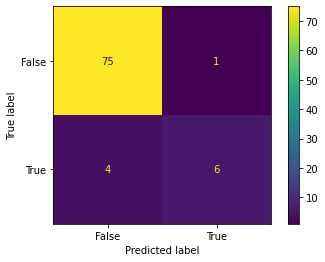

In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt
 
# make predictions
predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [49]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.6
specificity:  0.9868421052631579
PPV:  0.8571428571428571
NPV:  0.9493670886075949


In [50]:
# AUROC and AUPR value
from sklearn.metrics import auc, roc_curve, precision_recall_curve

y_predictProb = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9763157894736842
AUPR: 0.6873792873792873


<function matplotlib.pyplot.show(close=None, block=None)>

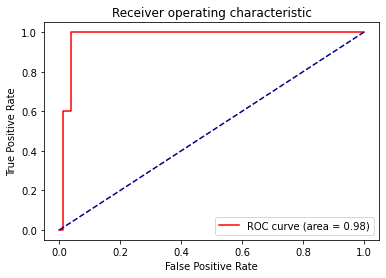

In [51]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

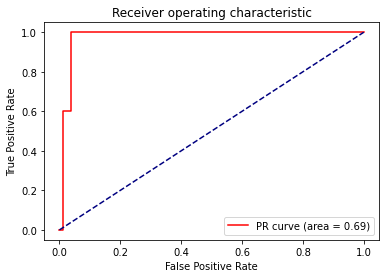

In [52]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [54]:
model_score2 = forest.score(X_test, Y_test)
model_score1 = forest.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9854651162790697
0.9302325581395349


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(forest , X_train, Y_train, cv = kf)
result


array([0.94285714, 0.91428571, 0.91428571, 0.85714286, 0.94117647,
       0.85294118, 0.88235294, 0.85294118, 0.97058824, 0.94117647])

In [56]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9069747899159664


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(forest , X_test, Y_test, cv = kf)
result

array([0.77777778, 0.77777778, 1.        , 0.88888889, 0.77777778,
       1.        , 1.        , 1.        , 0.875     , 0.875     ])

In [58]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8972222222222221


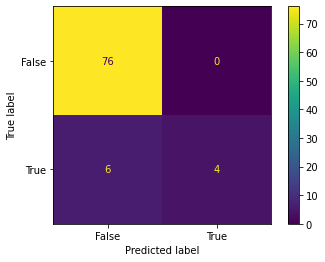

In [59]:
# make predictions
predicted = forest.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [60]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.4
specificity:  1.0
PPV:  1.0
NPV:  0.926829268292683


In [61]:
y_predictProb = forest.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9427631578947369
AUPR: 0.8483333333333334


<function matplotlib.pyplot.show(close=None, block=None)>

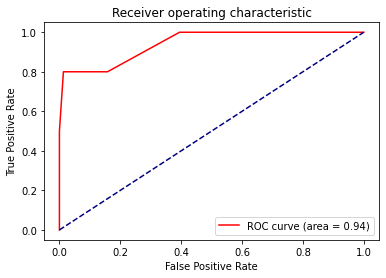

In [62]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

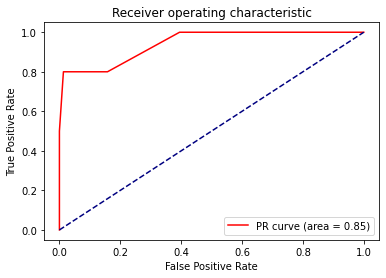

In [63]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Decision Tree

In [64]:
# using decisin tree
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [65]:
model_score2 = dclf.score(X_test, Y_test)
model_score1 = dclf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

1.0
0.9418604651162791


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dclf , X_train, Y_train, cv = kf)
result


array([0.85714286, 0.85714286, 0.97142857, 0.82857143, 0.91176471,
       0.76470588, 0.85294118, 0.85294118, 0.91176471, 0.88235294])

In [67]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8690756302521008


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dclf , X_test, Y_test, cv = kf)
result

array([0.88888889, 0.88888889, 1.        , 0.88888889, 1.        ,
       1.        , 1.        , 1.        , 0.875     , 1.        ])

In [69]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9541666666666666


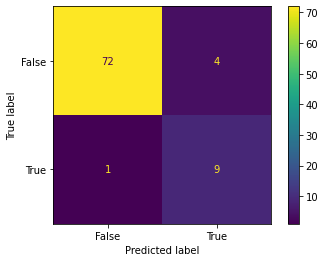

In [70]:
# make predictions
predicted = dclf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [71]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.9
specificity:  0.9473684210526315
PPV:  0.6923076923076923
NPV:  0.9863013698630136


In [72]:
# AUROC and AUPR value
y_predictProb = dclf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9236842105263158
AUPR: 0.8019677996422182


<function matplotlib.pyplot.show(close=None, block=None)>

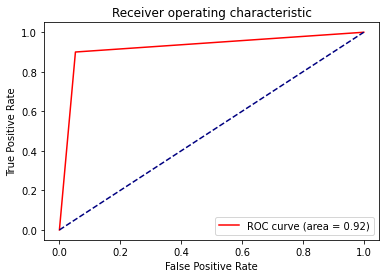

In [73]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

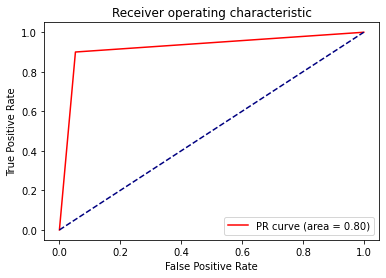

In [74]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Gradient Boost

In [75]:
#using GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
gdb.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=10, random_state=1)

In [76]:
model_score2 = gdb.score(X_test, Y_test)
model_score1 = gdb.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9418604651162791
0.9069767441860465


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gdb , X_train, Y_train, cv = kf)
result

array([0.91428571, 0.88571429, 0.91428571, 0.82857143, 0.91176471,
       0.85294118, 0.82352941, 0.85294118, 0.94117647, 0.91176471])

In [78]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8836974789915967


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gdb , X_test, Y_test, cv = kf)
result

array([0.88888889, 0.88888889, 1.        , 0.88888889, 0.88888889,
       1.        , 1.        , 1.        , 0.875     , 1.        ])

In [80]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9430555555555555


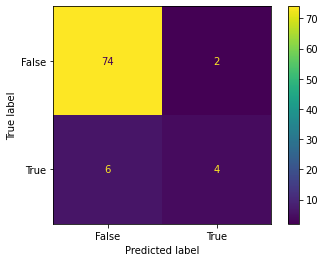

In [81]:
# make predictions
predicted = gdb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [82]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.4
specificity:  0.9736842105263158
PPV:  0.6666666666666666
NPV:  0.925


In [83]:
# AUROC and AUPR value
y_predictProb = gdb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9677631578947369
AUPR: 0.7163545482295482


<function matplotlib.pyplot.show(close=None, block=None)>

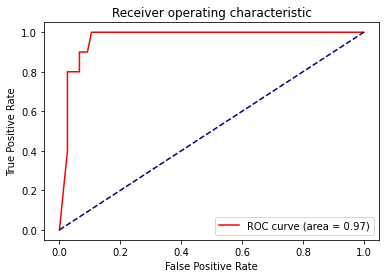

In [84]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

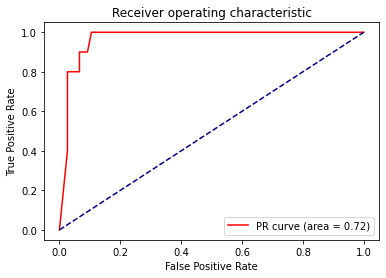

In [85]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# XGBosst

In [86]:
#using XGBClassifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state = 1, n_estimators = 10, min_samples_split = 3)
xgb_clf.fit(X_train, Y_train)

[21:42:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              min_samples_split=3, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, ...)

In [87]:
model_score2 = xgb_clf.score(X_test, Y_test)
model_score1 = xgb_clf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9912790697674418
0.9418604651162791


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_clf , X_train, Y_train, cv = kf)
result


[21:42:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:42:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:42:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

array([0.85714286, 0.91428571, 0.91428571, 0.88571429, 0.91176471,
       0.88235294, 0.88235294, 0.85294118, 0.94117647, 0.94117647])

In [89]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8983193277310925


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_clf , X_test, Y_test, cv = kf)
result

[21:42:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:42:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:42:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

array([0.88888889, 1.        , 1.        , 0.88888889, 0.88888889,
       1.        , 1.        , 1.        , 0.875     , 1.        ])

In [91]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9541666666666666


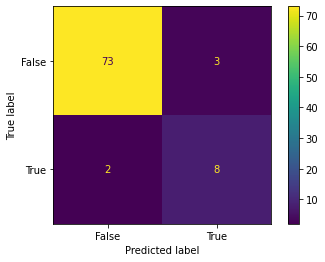

In [92]:
# make predictions
predicted = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [93]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.8
specificity:  0.9605263157894737
PPV:  0.7272727272727273
NPV:  0.9733333333333334


In [94]:
# AUROC and AUPR value
y_predictProb = xgb_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9657894736842105
AUPR: 0.7286928104575163


<function matplotlib.pyplot.show(close=None, block=None)>

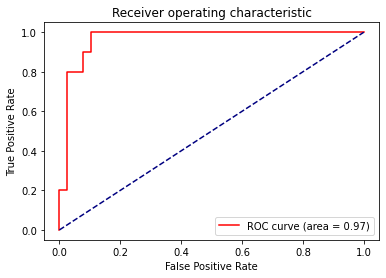

In [95]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

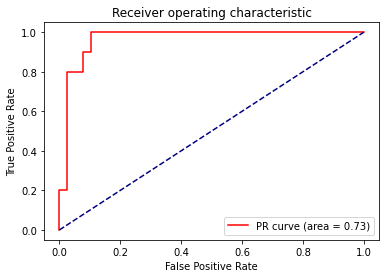

In [96]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Support Vector

In [97]:
#using support vector
from sklearn import svm
sv_clf = svm.SVC()
sv_clf.fit(X_train, Y_train)

SVC()

In [98]:
model_score2 = sv_clf.score(X_test, Y_test)
model_score1 = sv_clf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9156976744186046
0.9069767441860465


In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(sv_clf , X_train, Y_train, cv = kf)
result


array([0.91428571, 0.91428571, 0.91428571, 0.88571429, 0.91176471,
       0.88235294, 0.91176471, 0.91176471, 0.97058824, 0.91176471])

In [100]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9128571428571428


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(sv_clf , X_test, Y_test, cv = kf)
result

array([0.88888889, 1.        , 1.        , 0.88888889, 0.88888889,
       1.        , 1.        , 1.        , 0.875     , 0.875     ])

In [102]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9416666666666667


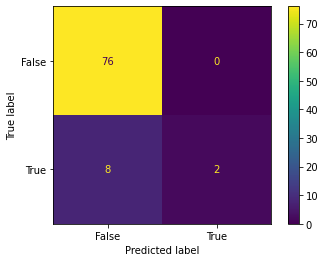

In [103]:
# make predictions
predicted = sv_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [104]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.2
specificity:  1.0
PPV:  1.0
NPV:  0.9047619047619048


In [105]:
# AUROC and AUPR value
y_predictProb = sv_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

In [ ]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Naive Bayes

In [106]:
#using Naive Bayesian 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [107]:
model_score2 = gnb.score(X_test, Y_test)
model_score1 = gnb.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.8633720930232558
0.9651162790697675


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gnb , X_train, Y_train, cv = kf)
result


array([0.77142857, 0.82857143, 0.77142857, 0.91428571, 0.94117647,
       0.79411765, 0.91176471, 0.82352941, 0.88235294, 0.76470588])

In [109]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8403361344537814


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gnb , X_test, Y_test, cv = kf)
result

array([0.88888889, 0.77777778, 0.77777778, 0.55555556, 0.66666667,
       1.        , 1.        , 0.875     , 0.75      , 0.875     ])

In [111]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8166666666666667


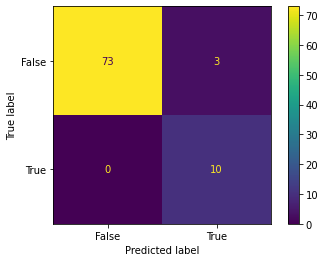

In [112]:
# make predictions
predicted = gnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [113]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  1.0
specificity:  0.9605263157894737
PPV:  0.7692307692307693
NPV:  1.0


In [114]:
# AUROC and AUPR value
y_predictProb = gnb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.986842105263158
AUPR: 0.8726713564213564


<function matplotlib.pyplot.show(close=None, block=None)>

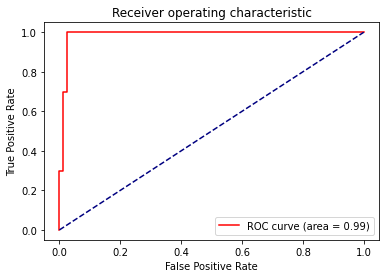

In [115]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

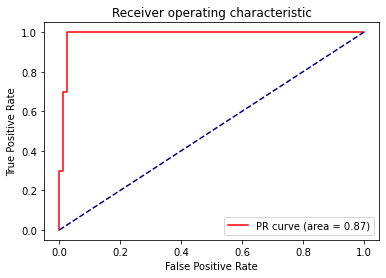

In [116]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show